## SVM ##
Richard Sowers 2018-05-24

Copyright 2018 University of Illinois Board of Trustees. All Rights Reserved. Licensed under the MIT license

In [20]:
import numpy
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.optimize

In [30]:
numpy.random.seed(0)
N=50
def classifier(point):
    (x,y)=point
    return 1 if 2*x+3*y>1 else -1

In [31]:
points=numpy.random.normal(size=[N,2])
data=[((x,y),classifier((x,y))) for (x,y) in points]
print(data[:10])

[((1.764052345967664, 0.4001572083672233), 1), ((0.9787379841057392, 2.240893199201458), 1), ((1.8675579901499675, -0.977277879876411), -1), ((0.9500884175255894, -0.1513572082976979), 1), ((-0.10321885179355784, 0.41059850193837233), 1), ((0.144043571160878, 1.454273506962975), 1), ((0.7610377251469934, 0.12167501649282841), 1), ((0.44386323274542566, 0.33367432737426683), 1), ((1.4940790731576061, -0.20515826376580087), 1), ((0.31306770165090136, -0.8540957393017248), -1)]


In [32]:
red_pts=numpy.array([point for (point,flag) in data if flag==1])
green_pts=numpy.array([point for (point,flag) in data if flag==-1])

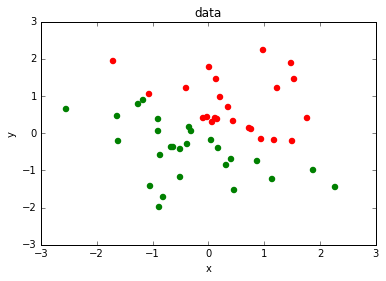

In [36]:
plt.figure()
plt.scatter(red_pts[:,0],red_pts[:,1],color="red",linewidth=2)
plt.scatter(green_pts[:,0],green_pts[:,1],color="green",linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("data")
plt.show()
plt.close()

In [5]:
class SVM:
    def __init__(self,data,penalty=0):
        self.xvals=[x for (x,_) in data]
        self.yvals=[y for (_,y) in data]
        self.penalty=penalty
        self.ctr=0
        
    def make_logistic_function(self,scale_inv,threshold):
        def logistic_function(x):
            temp=scale_inv*(x-threshold) #the standard notation is mx+b, which I have written as
            #inverse scale and threshold; this is for simplicity
            temp=numpy.exp(temp)
            return temp/(1+temp)
        return logistic_function
    
    def Err(self,x):
        (scale_inv,threshold)=x
        logistic_function=self.make_logistic_function(scale_inv,threshold)
        err=yvals-logistic_function(xvals)
        return numpy.mean(err**2)+self.penalty*scale_inv**2 ## could use numpy.sum
    
    def callback(self,x):
        print("ctr="+str(self.ctr)+"; x="+str(x)+"; error="+str(self.Err(x)))
        self.ctr+=1
               


## Standard logistic regression can lead to overflow as exponentials become too big or small

In [6]:
Reg=Regression(data)
print("\nxvals:\n"+str(Reg.xvals[:10]))
print("\nyvals:\n"+str(Reg.yvals[:10]))
logistic=Reg.make_logistic_function(2,4)
print("\nlogistic(1)="+str(logistic(1)))
print("\nError([1,0.3])="+str(Reg.Err([2,4])))
out=scipy.optimize.minimize(Reg.Err,[0.1,0.1],callback=Reg.callback)
print(out)
(scale_inv,threshold)=out.x
print("estimated (scale_inv,threshold)="+str((scale_inv,threshold)))

C:\Users\richa\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: overflow encountered in exp
C:\Users\richa\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: invalid value encountered in true_divide
C:\Users\richa\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: overflow encountered in exp



xvals:
[1.764052345967664, 0.4001572083672233, 0.9787379841057392, 2.240893199201458, 1.8675579901499675, -0.977277879876411, 0.9500884175255894, -0.1513572082976979, -0.10321885179355784, 0.41059850193837233]

yvals:
[1, 1, 1, 1, 1, 0, 1, 0, 0, 1]

logistic(1)=0.0024726231566347748

Error([1,0.3])=0.37423829752949156
ctr=0; x=[0.28528367 0.10593298]; error=0.19889585463020995
ctr=1; x=[0.6891848  0.14582771]; error=0.14555194608672878
ctr=2; x=[1.52817582 0.28872124]; error=0.08341635983647669
ctr=3; x=[2.15943544 0.40439252]; error=0.06307197627078763
ctr=4; x=[2.65144747 0.43827143]; error=0.05517065781329555
ctr=5; x=[3.40476387 0.40786058]; error=0.044290590500683756
ctr=6; x=[4.87700825 0.28429716]; error=0.02893679472440879
ctr=7; x=[6.04208035 0.23695827]; error=0.024937443056443423
ctr=8; x=[7.15853478 0.25278126]; error=0.020729564613914776
ctr=9; x=[9.65786553 0.29733346]; error=0.01503126320136887
ctr=10; x=[12.47070453  0.29426117]; error=0.011666817034241295
ctr=11; x=[1

C:\Users\richa\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: invalid value encountered in true_divide
C:\Users\richa\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: overflow encountered in exp
C:\Users\richa\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: invalid value encountered in true_divide
C:\Users\richa\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


## Penalize the scale (preventing overflow)

In [7]:
Reg=Regression(data,penalty=0.001)
out=scipy.optimize.minimize(Reg.Err,[0.1,0.1],callback=Reg.callback)
print(out)
(scale_inv,threshold)=out.x
print("estimated (scale_inv,threshold)="+str((scale_inv,threshold)))

ctr=0; x=[0.28508367 0.10593298]; error=0.19900871054502312
ctr=1; x=[0.68904    0.14595044]; error=0.14603799156316918
ctr=2; x=[1.5048949  0.28597143]; error=0.08676441118834133
ctr=3; x=[2.08921951 0.39626582]; error=0.06893460476014904
ctr=4; x=[2.49310175 0.42584639]; error=0.06331440264544373
ctr=5; x=[2.99446805 0.39896065]; error=0.057318443955130895
ctr=6; x=[3.88023079 0.29205309]; error=0.05106009441779061
ctr=7; x=[3.98369174 0.28759637]; error=0.05099177544423299
ctr=8; x=[4.04541507 0.29090791]; error=0.05096430700167691
ctr=9; x=[4.06049409 0.29317872]; error=0.050961569060214956
ctr=10; x=[4.0598097  0.29327241]; error=0.05096156395146048
      fun: 0.05096156395146048
 hess_inv: array([[ 1.57386783e+02, -1.15284952e-01],
       [-1.15284952e-01,  1.35484213e+00]])
      jac: array([ 6.48200512e-07, -4.12529334e-06])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 11
     njev: 12
   status: 0
  success: True
        x: array([4.0598097 , 0.2

In [8]:
## Intermediate penalization can lead to the wrong answer

In [10]:
Reg=Regression(data,penalty=0.1)
out=scipy.optimize.minimize(Reg.Err,[0.1,0.1],callback=Reg.callback)
print(out)
(scale_inv,threshold)=out.x
print("estimated (scale_inv,threshold)="+str((scale_inv,threshold)))

ctr=0; x=[0.26528367 0.10593298]; error=0.2091218606541012
ctr=1; x=[0.58427336 0.14928863]; error=0.19115689947104003
ctr=2; x=[0.59863175 0.17885562]; error=0.19039396404948278
ctr=3; x=[0.61236251 0.2396683 ]; error=0.1889573601288628
ctr=4; x=[0.62635346 0.36784829]; error=0.18650442688381783
ctr=5; x=[0.6261419  0.66242459]; error=0.1839225026240652
ctr=6; x=[0.59328415 0.69726263]; error=0.18346631527495622
ctr=7; x=[0.56622815 0.74102429]; error=0.18334011097051467
ctr=8; x=[0.56594282 0.74721222]; error=0.1833391131520899
ctr=9; x=[0.5659035  0.74831203]; error=0.183339089429571
      fun: 0.183339089429571
 hess_inv: array([[ 3.12464113, -3.8261774 ],
       [-3.8261774 , 28.30079155]])
      jac: array([ 4.61935997e-07, -8.75443220e-08])
  message: 'Optimization terminated successfully.'
     nfev: 44
      nit: 10
     njev: 11
   status: 0
  success: True
        x: array([0.5659035 , 0.74831203])
estimated (scale_inv,threshold)=(0.5659034967932198, 0.748312027582126)
